# Fluidinámica computacional

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

/home/ecastro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Tarea

## 1. Curvas RTD

Utilizando los resultados de simulación, trace las curvas $F$ vs $\theta$, y $C$ vs $\theta$ correspondientes.

- Calcule las variables adimensionales requeridas, $\theta$, $F$, y $C$.

- Trace las curvas $F$ vs $\theta$, y $C$ vs $\theta$ correspondientes.

- Comente sobre las curvas, comparando su comportamiento contra las curvas para flujo en reactores idealizados que se muestran debajo. 

<center>

<img src="figures/images/idealFCurves.png" style="width:400px" title="F vs theta">

***Figura 01. Curvas F para flujo en reactores idealizados.***

</center>

<center>

<img src="figures/images/idealCCurves.png" style="width:400px" title="C vs theta">

***Figura 02. Curvas C para flujo en reactores idealizados.***

</center>

## Respuesta:

### Leer datos de concentración de trazador

In [2]:
# load data of tracer concentration 
path = "figures/openFoam/scalarValueAtOutlet.dat"
df = pd.read_csv(path, sep="\t", header=4)

# modify the column names so they are more "friendly"
mapper = {'# Time          ':"t",
          'areaAverage(T)': 'c'}
df.rename(columns=mapper, inplace=True)

In [3]:
display(df)

,t,c
0,0.5,2.036168e-161
1,1.0,1.547883e-150
2,1.5,3.160075e-142
3,2.0,2.271506e-135
4,2.5,1.736555e-129
...,...,...
1195,598.0,1.005957e+00
1196,598.5,1.006069e+00
1197,599.0,1.006180e+00
1198,599.5,1.006291e+00


### Estimación de variables adimensionales

#### tiempo, $\theta$

In [4]:
# add a column with dimensionless time (theta)
tr = 280.0 # theoretical residence time, [s]
df['theta'] = df['t'] / tr

#### concentración, $F$

In [5]:
# add column with dimensionless concentration F
ci = 1 # tracer concentration at entrance
df["F"] = df['c'] / ci

#### concentración, $C$

In [6]:
# add column with dimensionless concentration C
df["C"] = np.gradient(df["F"].to_numpy(), df["theta"].to_numpy())

### Gráficos con comentarios

#### Curva $F$ vs $\theta$

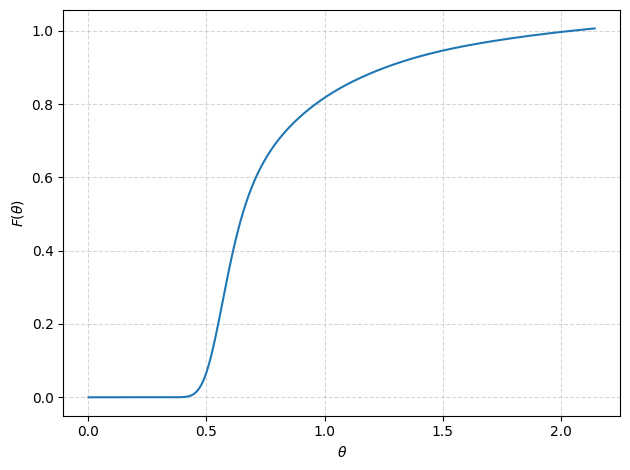

In [7]:
fig, ax = plt.subplots()
x = df['theta'].to_numpy()
y = df['F'].to_numpy()
ax.plot(x, y, label=r"$F(\theta)$")
ax.set(xlabel=r"$\theta$", ylabel=r"$F(\theta)$")
ax.grid(ls='--', alpha=0.5)
fig.tight_layout()
plt.show()

Al comparar la curva $F(\theta)$ contra los casos idealizados de flujo pistón y flujo en un reactor perfectamente agitado se tiene que:

- La curva comienza a crecer hasta que cierto tiempo de latencia (en este caso $\theta \approx 0.5$) ha transcurrido. Esta característica se comparte con el flujo pistón.

- Después del crecimiento "subito" de la curva, la curva exhibe un crecimiento hacia un valor asintótico de uno. Esta característica se comparte con el flujo perfectamente agitado.

#### Curva $C$ vs $\theta$

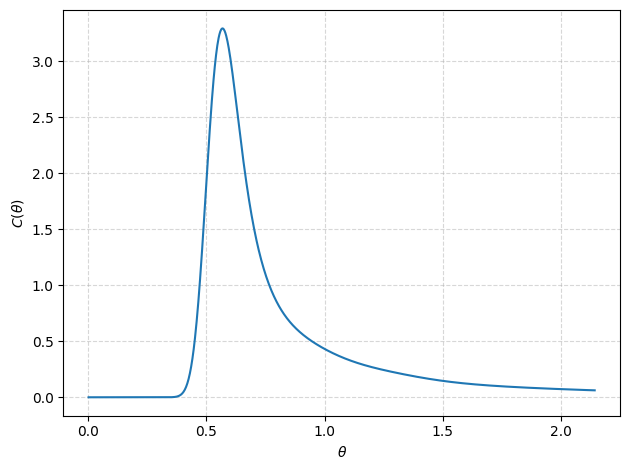

In [8]:
fig, ax = plt.subplots()
x = df['theta'].to_numpy()
y = df['C'].to_numpy()
ax.plot(x, y, label=r"$F(\theta)$")
ax.set(xlabel=r"$\theta$", ylabel=r"$C(\theta)$")
ax.grid(ls='--', alpha=0.5)
fig.tight_layout()
plt.show()

Al comparar la curva $C(\theta)$ contra los casos idealizados de flujo pistón y flujo en un reactor perfectamente agitado se tiene que:

- La curva comienza a crecer hasta que cierto tiempo de latencia (en este caso $\theta \approx 0.5$) ha transcurrido. Esta característica se comparte con el flujo pistón.

- Después del crecimiento "subito" de la curva, la curva exhibe una disminuación hacia el valor asintótico de cero. Esta característica se comparte con el flujo perfectamente agitado.

## 2. Fracciones volumétricas de zonas en el reactor

El análisis de curvas RTD permite realizar una evaluación global de la "repartición" de distintas zonas de flujo en el volumen del reactor

$$
V_{dp} + V_{m} + V_{d} = \bar{V}
$$


<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

**$V_{dp}$**: volumen de zona con flujo pistón disperso, en $[\mathrm{m^3}]$.

**$V_{m}$**: volumen de zona con flujo mixto, en $[\mathrm{m^3}]$.

**$V_{d}$**: volumen de zona con flujo muerto, en $[\mathrm{m^3}]$.

**$\bar{V}$**: volumen total del reactor, en $[\mathrm{m^3}]$.

</div>

</details>

Utilizando las siguientes ecuaciones se puede estimar la contribución de cada una de las zonas:

$$
\frac{V_{dp}}{\bar{V}} = \frac{\theta_{min} + \theta_{max}}{2}
$$

$$
\frac{V_d}{\bar{V}} = 1 - \left[\sum_{\theta=0}^{\theta=2} C(\theta)\,\Delta\theta \right] \cdot \bar{\theta}
$$

$$
\frac{V_m}{V} = 1 - \frac{V_{dp}}{V} - \frac{V_{d}}{V}
$$

Para utilizar las ecuaciones presentadas arriba, se requiere tener conocimiento de la curva $C(\theta)$ y de los tiempos característicos del reactor, que se muestran en la tabla debajo:

<center>

| nombre | definición |
|--------|------------|
| tiempo de residencia teórico | $t_r = \frac{\bar{V}}{\dot{v}}$ |
| tiempo de residencia (adimensional) | $\theta = \frac{t}{t_r}$ |
| tiempo de residencia promedio (adimensional) | $\bar{\theta} = \frac{\int_0^{2\theta} \theta C(\theta) d\theta}{\int_0^{2\theta} C(\theta) d\theta}$ |
| tiempo de residencia mínimo (adimensional) | $\theta_{min}$ |
| tiempo de residencia máximo (adimensional) | $\theta_{max}$ |

</center>

Con los resultados del Análisis RTD de los resultados de simulación, estime la repartición de distintas zonas en el reactor.

# Respuesta

### tiempos de interés

**tiempo de residencia teórico:**

In [9]:
V = 3.5 * 0.8 * 0.1 # volumen del reactor, [m3]
v = 0.1 * 0.1 * 0.1 # flujo volumétrico en el reactor, [m3.s-1]
tr = V/v
print(f"tr = {np.round(tr, decimals=2)} [s]")

tr = 280.0 [s]


In [10]:
# guardar datos hasta 2 tiempos de residencia
eps = 1e-3
df2 = df[df["t"] <= (2*tr+eps)]

**tiempo de residencia (adimensional):**

In [11]:
theta = df2['theta'] # dimless residence time
C = df2['C'] # dimless concentration

**tiempo de residencia promedio (adimensional):**


In [12]:
# numerador
y = theta * C
x = theta
num = trapezoid(y, x)

# denominador
y = C
x = theta
den = trapezoid(y, x)

# tiempo de residencia promedio
thetaAvg = num / den
print(f"̄θ = {np.round(thetaAvg, decimals=4)}")

̄θ = 0.7739


**tiempo de residencia mínimo (adimensional):**

In [13]:
minThreshold = 1e-1
ind_tmin = np.argwhere(np.array(C)>minThreshold)[0][0] # indice en array en donde está t_min
thetaMin = theta[ind_tmin]
print(f"θ(min) = {np.round(thetaMin, decimals=4)}")
print(f"index: {ind_tmin}")

θ(min) = 0.4161
index: 232


**tiempo de residencia máximo (adimensional):**

In [14]:
Cmax = max(C)
ind_tmax = np.argwhere(np.array(C)==Cmax)[0][0] # indice en array en donde está t_max
thetaMax = theta[ind_tmax]
print(f"θ(max) = {np.round(thetaMax, decimals=4)}")
print(f"C(max) = {np.round(Cmax, decimals=4)}")
print(f"index: {ind_tmax}")

θ(max) = 0.5679
C(max) = 3.294
index: 317


### Estimación de fracciones volumétricas del reactor

**Zona con flujo pistón disperso:**

In [15]:
V = 3.5 * 0.8 * 0.1 # volumen del reactor, [m3]
Vdp_V = 0.5 * (thetaMin + thetaMax)

**Zona con flujo muerto:**

In [16]:
dTheta = np.gradient(theta)
Vd_V = 1 - (np.sum(C * dTheta)) * thetaAvg

**Zona con flujo mixto:**

In [17]:
Vm_V = 1 - Vdp_V - Vd_V;

**Repartición de zonas:**

In [18]:
print("REPARTICION VOLUMETRICA DE ZONAS:")
print(f"pistón disperso: {np.round(Vdp_V, decimals=4)}")
print(f"flujo mixto    : {np.round(Vm_V, decimals=4)}")
print(f"zonas muertas  : {np.round(Vd_V, decimals=4)}")

REPARTICION VOLUMETRICA DE ZONAS:
pistón disperso: 0.492
flujo mixto    : 0.2796
zonas muertas  : 0.2285
